In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, precision_score



In [2]:
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from PIL import Image
from skimage.feature import blob
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, accuracy_score, log_loss
test_data = np.random.beta(1,1, size= (100,100,3))

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd 'drive/Shareddrives/ML PROJECT'
%cd ..
%ls

G:\Shared drives\ML PROJECT\FP_Nehal_Anthony_Alex
 Volume in drive G is Google Drive
 Volume Serial Number is 1983-1116

 Directory of G:\Shared drives\ML PROJECT\FP_Nehal_Anthony_Alex

2022-04-26  03:33 PM    <DIR>          .
2022-04-26  03:26 PM    <DIR>          ..
2022-04-26  03:13 PM    <DIR>          EDA
2022-04-26  04:07 PM    <DIR>          Original_data
2022-04-26  04:04 PM    <DIR>          pseudo_resnet20
2022-04-26  03:31 PM                 0 Readme.txt
2022-04-26  03:14 PM    <DIR>          ResNet20
2022-04-26  04:07 PM    <DIR>          Resnet50
2022-04-26  03:30 PM    <DIR>          SVM
2022-04-26  04:05 PM    <DIR>          VanillaCNN
               1 File(s)              0 bytes
               9 Dir(s)  18,157,404,160 bytes free


,genus
id,
520,1.0
3800,1.0
3289,1.0
2695,1.0
4922,1.0


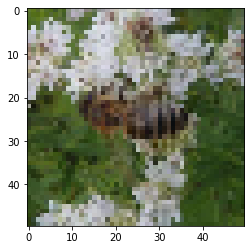

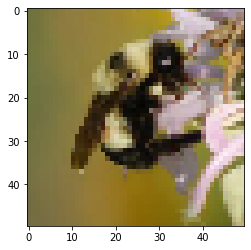

In [4]:
labels = pd.read_csv("Original_data/dataset_alternate/labels_1.csv", index_col=0)
display(labels.head())

def get_image(row_id, root="Original_data/dataset_alternate/dataset_1"):
    filename = "{}.jpg".format(row_id)
    file_path = os.path.join(root, filename)
    img = Image.open(file_path)
    return np.array(img)
apis_row = labels[labels.genus == 0.0].index[5]

plt.imshow(get_image(apis_row))
plt.show()
bombus_row = labels[labels.genus == 1.0].index[5]
plt.imshow(get_image(bombus_row))
plt.show()


Color bombus image has shape:  (50, 50, 3)
Grayscale bombus image has shape:  (50, 50)


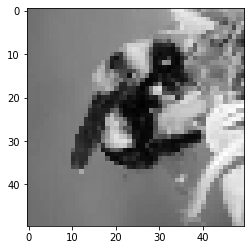

In [5]:
bombus = get_image(bombus_row)
print('Color bombus image has shape: ', bombus.shape)
gray_bombus = rgb2gray(bombus)
plt.imshow(gray_bombus, cmap=mpl.cm.gray)
print('Grayscale bombus image has shape: ', gray_bombus.shape)

Text(0.5, 1.0, 'HOG image with 2x2 pixles-per-cell ')

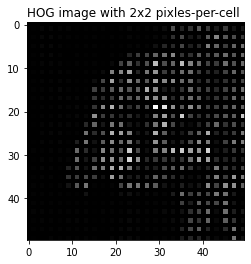

In [12]:
hog_features, hog_image = hog(gray_bombus,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(2, 2))

plt.imshow(hog_image, cmap=mpl.cm.gray)
plt.title("HOG image with 2x2 pixles-per-cell ")

Text(0.5, 1.0, 'HOG image with 8x8 pixles-per-cell ')

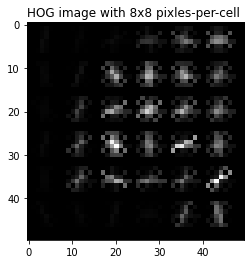

In [13]:
hog_features, hog_image = hog(gray_bombus,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(8, 8))

plt.imshow(hog_image, cmap=mpl.cm.gray)
plt.title("HOG image with 8x8 pixles-per-cell ")

In [ ]:
def create_features(img):
    color_features = img.flatten()
    gray_image = rgb2gray(img)
    hog_features = hog(gray_image, block_norm='L2-Hys', pixels_per_cell=(2, 2))
    flat_features = np.hstack([color_features, hog_features])
    return flat_features

bombus_features = create_features(bombus)
bombus_features.shape 

(50349,)

In [ ]:
def create_feature_matrix(label_dataframe):
    features_list = []
    
    for img_id in label_dataframe.index:
        img = get_image(img_id)
        image_features = create_features(img)
        features_list.append(image_features)
        
    feature_matrix = np.array(features_list)
    return feature_matrix
feature_matrix = create_feature_matrix(labels)

In [ ]:
feature_matrix[0]

array([127., 108.,  95., ...,   0.,   0.,   0.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix,
                                                    labels.genus.values,
                                                    test_size=.3,
                                                    random_state=84)

pd.Series(y_train).value_counts()

1.0    582
0.0    575
dtype: int64

In [ ]:
print('Training features matrix shape is: ', X_train.shape)

ss = StandardScaler()
train_stand = ss.fit_transform(X_train)

pca = PCA(n_components=350)

X_train = pca.fit_transform(train_stand)

print('Training features matrix shape is: ', X_train.shape)

Training features matrix shape is:  (1157, 50349)
Training features matrix shape is:  (1157, 350)


In [ ]:

print('Test features matrix shape is: ', X_test.shape)

test_stand = ss.transform(X_test)

X_test = pca.transform(test_stand)
print('Test features matrix shape is: ', X_test.shape)

Test features matrix shape is:  (497, 50349)
Test features matrix shape is:  (497, 350)


#Implemented SVM models#


In [ ]:
#Linear
svm = SVC(kernel='linear', probability=True, random_state=84)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=84)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
#Due to the computational intensity of the SVM, I was unable to itereate through each parameter in a loop
#My initial plan was to loop through and append a list with  accuracy, but the session timed out each time. 
#Instead, I ran each parameter individually and recorded the accuracy in the list below. 

linearAcc = [0.6177062374245473, 0.6438631790744467, 0.613682092555332, 0.6116700201207244, 0.5935613682092555]

In [ ]:

linearAcc.append(accuracy)

In [ ]:
linearAcc

[0.6177062374245473,
 0.6438631790744467,
 0.613682092555332,
 0.6116700201207244,
 0.5935613682092555]

Text(0, 0.5, 'Accuracy Score')

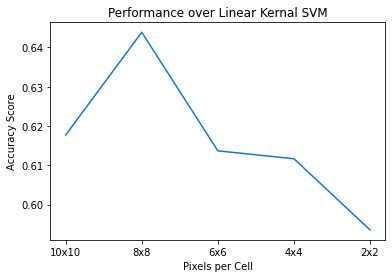

In [ ]:
resDim = ['10x10', '8x8', '6x6', '4x4', '2x2']
import matplotlib.pyplot as plt
plt.plot(resDim, linearAcc)
plt.title("Performance over Linear Kernal SVM")
plt.xlabel("Pixels per Cell")
plt.ylabel("Accuracy Score")

In [ ]:
#RBF
def create_features(img):
    color_features = img.flatten()
    gray_image = rgb2gray(img)
    hog_features = hog(gray_image, block_norm='L2-Hys', pixels_per_cell=(14, 14))
    flat_features = np.hstack([color_features, hog_features])
    return flat_features

bombus_features = create_features(bombus)
bombus_features.shape 

(7581,)

In [ ]:
def create_feature_matrix(label_dataframe):
    features_list = []
    
    for img_id in label_dataframe.index:
        img = get_image(img_id)
        image_features = create_features(img)
        features_list.append(image_features)
        
    feature_matrix = np.array(features_list)
    return feature_matrix
feature_matrix = create_feature_matrix(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix,
                                                    labels.genus.values,
                                                    test_size=.3,
                                                    random_state=84)

ss = StandardScaler()
train_stand = ss.fit_transform(X_train)

pca = PCA(n_components=350)
X_train = pca.fit_transform(train_stand)

test_stand = ss.transform(X_test)

X_test = pca.transform(test_stand)

In [ ]:
svm = SVC(kernel='rbf', probability=True, random_state=84)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6740442655935613


Text(0, 0.5, 'Accuracy Score')

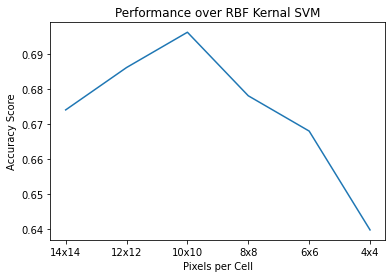

In [ ]:
rbfAcc = [0.6740442655935613, 0.6861167002012073, 0.6961770623742455, 0.6780684104627767, 0.6680080482897385, 0.6398390342052314]
resDim = ['14x14', '12x12', '10x10', '8x8', '6x6', '4x4']
import matplotlib.pyplot as plt
plt.plot(resDim, rbfAcc)
plt.title("Performance over RBF Kernal SVM")
plt.xlabel("Pixels per Cell")
plt.ylabel("Accuracy Score")